# Nome: Arthur Pontes Nader

# Matrícula: 2019022294

# Trabalho Prático 1

## Programa para resolução de sistemas triangulares:

In [6]:
def entrada():
    A = [] 
    B = []
    while True:
        try:
            n = int(input("Digite o numero de incognitas do sistema triangular: "))
            if n <=0:
                print("Erro! Seu sistema triangular nao pode ter menos que 1 incognita")
                continue
            break
        except ValueError:
            print("Erro! O numero de incognitas deve ser um numero natural diferente de 0")
    for b in range (1,n+1):
        while True:
            try:
                B.append((float(input("Digite o valor do termo independente b%d: " %b))))
                break
            except ValueError:
                print("Erro! Voce deve entrar com numeros reais")
    f = 0
    while f < n + 1:   ### um while junto com um for é capaz de fazer com que o usuario saiba qual coeficiente esta sendo digitado
        for a in range (1,f+1):
            while True:
                try:
                    A.append((float(input("Digite o valor do coeficiente a%d%d: " %(f,a))))) 
                    break
                except ValueError:
                    print("Erro! Voce deve entrar com numeros reais")
        f += 1 
    return A, B

def tp1(A,B):
    try:
        resolucao = list()
        for n in range (len(B)):    ##a execucao ocorrera para cada incognita no sistema
            s = 0
            p = int(n*(n+1)/2) ##padrao do primeiro coeficiente de cada linha
            for aux in range(n):      ##o padrao do somatorio aumenta um termo a cada linha, assim como o "range" do auxiliar
                s += A[p + aux]*resolucao[aux]   ##acumulador da soma dos (coeficientes)*(respectivas incognitas)
            resolucao.append((B[n]-s)/A[p + n]) ## divisao pelo padrao do denominador( n*(n+1)/2 + n), ou seja, do coeficiente da diagonal
    except ZeroDivisionError:     ##divisao por zero indica que o sistema possui infinitas ou nenhuma solucao
        if B[n]-s == 0:
            print("\n" "O sistema digitado possui infinitas solucoes")
        else:
            print("\n" "O sistema digitado nao possui solucao")
    return resolucao

def impressao(A,B,X):
    impressao = "\n" + "Voce digitou o seguinte sistema triangular: " + "\n"
    for n in range (len(B)): ## execucao para cada linha do sistema
        for k in range (n+1): ## execucao para o numero de coeficientes da linha
            j = int(n*(n+1)/2) ## padrao do primeiro coeficiente de cada linha
            if k == 0 and A[j] < 0:    ## formatacao do primeiro termo de cada linha caso ele seja menor que zero, sera explicado o motivo adiante
                impressao +=  "%8.2f" %A[j] + "x1"
                if k != n :       ## se k == n, nao havera um proximo sinal, pois  k == n é o ultimo termo
                    if A[j + 1] >= 0:        ## para se evitar que imprima dois sinais, o programa analisa o proximo termo (por nao ter um termo antecedente o primeiro termo da linha é analisado isoladamente)
                        impressao +=  "   +" ## se o proximo termo for menor que zero o sinal "-" sera adicionado na impressao
                    else:
                        impressao +=  "   -" ## se o proximo termo for maior que zero o sinal "+" sera adicionado na impressao
            else:
                impressao +=  " " + "%7.2f" %abs(A[j + k]) + "x%d" %(k+1) ##A[j + k] sao cada um dos coeficientes de uma determinada linha (incluindo o primeiro se esse for positivo)
                if k != n :
                    if A[j + k + 1] >= 0:
                        impressao +=  "   +"
                    else:
                        impressao +=  "   -"
        impressao +=  "              "*(len(B)-n-1) + " = " + "%-7.2f" %(B[n]) + "\n"   ## ao final da linha, sera posto o termo independente correspondente mais um salto de linha
    if len(X) == len(B):     ## len(X) = len(B) indica que o sistema possui solucao 
        impressao += "\n" + "Os valores das incognitas que resolvem o sistema triangular dado sao:" + "\n"
        for n in range (1,len(X)+1):
            impressao += "x" + "%d" %n + " = " + "%7.4f" %X[n-1] + "\n"
    return impressao

A, B = entrada()
X = tp1(A,B)
print(impressao(A,B,X))

Digite o numero de incognitas do sistema triangular: 4
Digite o valor do termo independente b1: 10
Digite o valor do termo independente b2: 5
Digite o valor do termo independente b3: 8
Digite o valor do termo independente b4: 150
Digite o valor do coeficiente a11: -2
Digite o valor do coeficiente a21: 1
Digite o valor do coeficiente a22: 5
Digite o valor do coeficiente a31: 2
Digite o valor do coeficiente a32: -2
Digite o valor do coeficiente a33: 4
Digite o valor do coeficiente a41: 20
Digite o valor do coeficiente a42: 4
Digite o valor do coeficiente a43: -3
Digite o valor do coeficiente a44: 4

Voce digitou o seguinte sistema triangular: 
   -2.00x1                                           = 10.00  
    1.00x1   +    5.00x2                             = 5.00   
    2.00x1   -    2.00x2   +    4.00x3               = 8.00   
   20.00x1   +    4.00x2   -    3.00x3   +    4.00x4 = 150.00 

Os valores das incognitas que resolvem o sistema triangular dado sao:
x1 = -5.0000
x2 =  2.0000
x

## Documentação

## Descrição sucinta sobre o desenvolvimento do trabalho

O trabalho proposto consistia em resolver sistemas triangulares utilizando listas. A princípio, estava-se solucionando o problema gerando listas dentro de uma lista para os coeficientes. Ao final do processo, as listas de coeficientes e de termos independentes eram consumidas, impossibilitando a impressão do sistema triangular.

Depois de ter descartado essa ideia errônea, procurou-se achar o padrão da resolução de um sistema triangular, chegando-se a conclusão que era necessário acumular uma soma, subtrair esse somatório do valor do termo independente, e dividir o resultado pelo termo da diagonal da linha correspondente. Para isso, era necessário realizar duas repetições, sendo uma para o somatório (que varia conforme a linha) e outra para realizar esse processo para cada incógnita. Inicialmente, pensou-se em utilizar outra função ou um "while" para acumular o somatório e um "for" para repetir isso para cada incógnita. Entretanto, percebeu-se mais tarde que a utilização de dois "for" deixaria a função de resolução muito mais simples e com menos linhas que os outros métodos.

Outro fato a ser destacado na tomada de decisões foi a substituição de prints na função de impressão por uma acumulação de string, que deixa o programa com muito menos linhas e mais simples de ser entendido.
 
O programa, como um todo, funciona com operações realizadas sobre as duas listas entradas (a de termos independentes e de coeficientes). A cada ciclo de operação é gerada um novo valor que é adicionado na lista de resolução. Ao final, essas três listas são utilizadas para exibição do sistema e dos valores das incógnitas que o resolve.
 
Algoritmo da função de entrada
    
    -defina o número de incógnitas
    -leia os valores da lista de termos independetes
    -leia os valores da lista de coeficientes
    -retorne a lista de coeficientes e a lista de termos independentes

Algoritmo da função de resolução
    
    -tente:
        resolução <- lista vazia
        para n de 0 até tamanho da lista de termos independentes :
            Soma <- 0
            para o numero de coeficientes correspondente à linha n:
                Soma <- acumulação da soma dos coeficientes multiplicado pelos seus respectivos valores de incógnitas
            adicionar na lista resolução: (termo independente - Soma)/coeficiente da diagonal
    -exceto Divisão por zero:
        se b - Soma = 0
            imprima que o sistema possui infinitas soluções
        caso contrário:
            imprima que o sistema nao possui solução
    -retorne resolução

Algoritmo da função de saída
    
    -defina uma string chamada impressão
    -para n de 0 ate o tamanho da lista B:
        para o numero de coeficientes correspondente à linha em questão:
            impressão <- coeficiente e valor de x correspondentes
            se houver próximo termo:
                se ele for negativo:
                    impressão <- impressão + " - "
                caso contrario:
                    impressão <- impressão + " + "
        impressão <- impressão + espaçamento adequado + " = " + valor referente de b + salto de linha
    -se o tamanho da lista B for igual ao tamanho da lista X (sistema tem solução):
        impressão <- impressão + valores de X formatados
    -retorne impressão

## Descrição das funções e sua interdepêndencia

#### Função de entrada
O par A, B será responsável por executar a função entrada(), recebendo as listas geradas por ela por desempacotamento de uma tupla. A entrada de dados foi feita de tal forma que a  lista de termos independentes sempre tenha o mesmo tamanho do número de incógnitas entrado, enquanto a lista de coeficientes terá tamanho n*(n+1)/2, em que "n" é o número de incógnitas.
Na entrada dos coeficientes, utilizou-se um "while" e um "for" para que o input fosse formatado de forma que o usuário tivesse consciência de qual termo estava sendo entrado naquele exato momento. Por exemplo, se o termo a ser entrado estava na linha 3 e na coluna 2, o sistema exibiria: "Digite o valor do coeficiente a32: "
Fez-se o mesmo para a entrada de termos independentes, apesar dessa só possuir um parâmetro de localização, como por exemplo "b3".

#### Fução de resolução
A função tp1(A,B) precisará das listas A e B para realizar os cálculos de determinação das incógnitas, e por isso, irá  depender do retorno da função de entrada (as próprias listas A e B). A variável X executará a função (X = tp1(A,B)), recebendo a lista com os valores de resolução do sistema.
Os cálculos são baseados em dois padrões: um de somatório e outro de determinação de valor de uma das incógnitas. Esses dois padrões são repetidos para cada incógnita. Vale ressaltar que não é necessário acumular uma soma para o cálculo da primeira incógnita, sendo que essa entrará diretamente na lista de resolução por uma simples divisão. Isso fará com que a lista de resolução seja sempre compatível  com acumulação da soma, já que ambas (o padrão da quantidade de termos para acumulação da soma e a lista de resolução) crescem uma unidade a cada repetição. O exemplo a seguir é para acumulação de soma em um sistema com quatro incógnitas:

                        s = 0                                 
                        s =  A[1]X[0]
                        s =  A[3]X[0] + A[4]X[1]
                        s =  A[6]X[0] + A[7]X[1] + A[8]X[2]
                        
Percebe-se que o padrão do primeiro termo do coeficiente do somatório, (excetuando-se a primeira linha, que o próprio sistema não acumulará soma), é sempre n*(n+1)/2, em que n varia de acordo com o número de incógnitas (ou linhas) do sistema. Depois de ter determinado esse padrão, é possivel perceber que as multiplicações dos coeficientes pelos suas respectivas incógnitas crescem juntas. O somatório, inicialmente recebe 0 e vai acumulando a cada repetição. Para acumular essa soma, basta criar um "for" com um auxiliar que será somado ao padrão do primeiro termo e que irá determinar o valor da incógnita que será multiplicado, variando de 0 até o número da linha do sistema: 
        
                        s = 0
                        para aux de 0 até número de termos a serem somados:
                            s += A[padrao do primeiro termo da linha + aux]*resolucao[aux]
                                            
A determinação do valor de uma nova incógnita no mesmo sistema de quatro linhas exemplificado anteriormente será dado pelo seguinte padrão:                       
                        
                        X[0] = B[0]/A[0]
                        X[1] = (B[1] - s)/A[2]
                        X[2] = (B[2] - s)/A[5]
                        X[3] = (B[3] - s)/A[9]
 
Esse padrão, na verdade, é basicamente o padrão do denominador, que será sempre n*(n+1)/2 + n. Os cálculos para resolução serão realizar a subtração "termo independente - soma acumulada" e dividir o resultado pelo termo da diagonal (que é o mesmo que o denominador). Como já dito, o "for" repetirá os cálculos para cada incógnita, como mostrado pelo seguinte algoritmo:

                        para n de 0 até número de incógnitas: 
                            adicionar na lista:((B[n]-s)/A[n*(n+1)/2 + n])
          
 

#### Função de impressão
Ja a função impressao(A,B,X) usará as listas de entrada (A e B) e a lista de resolção (X), para acumular uma string que percorre as listas formatando cada elemento ou conjunto de elementos adequadamente a uma linha do sistema triangular com o devido espaçamento entre os termos. As incógnitas (x1,x2,x3,...,xn) também aparecerão em suas devidas posições com os seus respectivos coeficientes.  Quando essa função for printada, o sistema triangular digitado (utilizando A e B) e os valores das respectivas incógnitas (utilizando X) aparecerão de modo adequado. Se o sistema tiver solução parcial ou não tiver solução, ou seja, caso o tamanho da lista X seja diferente do da lista B, o sistema simplesmente irá considerar a lista X irrelevante. Isso é fundamental pois apesar de alguns valores de incógnitas poderem ser bem definidos, o sistema triangular como um todo não terá solução ou terá infinitas.
Essa função, apesar de ter ficado relativamente grande, é capaz de distinguir números positivos de negativos, fazendo com que não apareça dois sinais seguidos, aumentando assim a exatidão do alinhamento e a capacidade de formatação.

A dependência das funções é mostrada no diagrama a seguir:
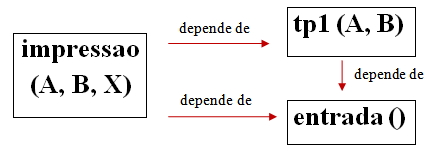

## Descrição do formato de entrada dos dados

A entrada do programa consiste em digitar o número de incógnitas do sistema triangular. Os números reais correspondentes aos valores dos coeficientes serão armazenados em listas para posterior processamento.
Validou-se a entrada de tal forma que só pudesse digitar os seguintes valores para cada variável:
- número de incógnitas: somente um número natural
- lista de termos independetes: números reais
- valores da lista dos coeficientes: números reais

## Descrição do formato de saída dos dados

O programa irá gerar uma string que, quando impressa, irá resultar na exibição do sistema triangular tomando como referência os valores de coeficientes e termos independentes entrados. Se o sistema tiver solução , o programa também mostrará as incógnitas com seu respectivos valores calculados. Por uma questão de formatação de exibição, os termos independentes e coeficientes terão até a segunda casa decimal mostrada, enquanto os valores das incógnitas serão apresentados com 4 casas decimais.

## Explicações sobre como utilizar o programa

Para utilização do programa, basta rodá-lo em uma console compatível e com processador adequado.

Após rodar, o programa irá solicitar que o usuário entre com o número de incógnitas do sistema. Em seguida, pedirá os valores dos termos independentes e dos coeficientes baseado no número de incógnitas digitado.


## Testes

#### Validação de entradas

Como mostrado a seguir, o programa não deixa que o usuário entre com valores não naturais ou igual a 0 para o número de incógnitas do sistema. Os coeficientes e os termos independetes devem ser números reais, caso contrário, o programa avisará o usuário e pedirá para que ele entre com os dados corretamente.

In [2]:
A, B = entrada()
X = tp1(A,B)
print(impressao(A,B,X))

Digite o numero de incognitas do sistema triangular: -2
Erro! Seu sistema triangular nao pode ter menos que 1 incognita
Digite o numero de incognitas do sistema triangular: 1
Digite o valor do termo independente b1: f
Erro! Voce deve entrar com numeros reais
Digite o valor do termo independente b1: 12.5
Digite o valor do coeficiente a11: !
Erro! Voce deve entrar com numeros reais
Digite o valor do coeficiente a11: 25

Voce digitou o seguinte sistema triangular: 
   25.00x1 = 12.50  

Os valores das incognitas que resolvem o sistema triangular dado sao:
x1 =  0.5000



#### Divisão por zero
O programa feito não é afetado por divisões por zero, já que se definiu na função de resolção que, caso isso ocorresse, a própria função iria analisar o sistema (mais especificamente o valor do termo independente menos a soma acumulada) e retornar se o sistema entrado possuía nenhuma ou infinitas soluções. Mesmo assim, o programa ainda imprime o sistema entrado, de tal forma que o usuário encontre em qual termo da diagonal foi posto um coeficiente igual a 0. Deixou-se que o usuário entrasse com termos na diagonal igual a 0 para que se aumentasse a sua liberdade de montar o sistema triangular, além de ser mais condizente com a realidade, em que há vários casos de sistemas desse tipo. Exemplo:

In [3]:
A, B = entrada()
X = tp1(A,B)
print(impressao(A,B,X))

Digite o numero de incognitas do sistema triangular: 2
Digite o valor do termo independente b1: 1
Digite o valor do termo independente b2: 0
Digite o valor do coeficiente a11: 1
Digite o valor do coeficiente a21: 0
Digite o valor do coeficiente a22: 0

O sistema digitado possui infinitas solucoes

Voce digitou o seguinte sistema triangular: 
    1.00x1               = 1.00   
    0.00x1   +    0.00x2 = 0.00   



#### Representação dos resultados
Apesar da representação binária da base decimal em ponto flutuante não ser exata, o programa foi montado de tal forma que exibisse o arredondamento dessa representação em ponto flutuante. Os dois códigos a seguir exemplificam isso, sendo o primeiro uma divisao de float por float e o segundo a mesma divisão realizada pelo programa de resolução de sistemas triangulares.

In [5]:
1.4/0.8

1.7499999999999998

In [9]:
A, B = entrada()
X = tp1(A,B)
print(impressao(A,B,X))

Digite o numero de incognitas do sistema triangular: 1
Digite o valor do termo independente b1: 1.4
Digite o valor do coeficiente a11: 0.8

Voce digitou o seguinte sistema triangular: 
    0.80x1 = 1.40   

Os valores das incognitas que resolvem o sistema triangular dado sao:
x1 =  1.7500



## Conclusão

O trabalho prático 1 possibilitou a expansão do conhecimento sobre a arte da programação de computadores devido ao desafio proposto de solucionar sistemas triangulares de equações utilizando somente o conhecimento adquirido até então. Foi capaz também de aumentar o repertório de conhecimento sobre lógica de programação e elaboração de algoritmos, sendo bastante útil para um desenvolvimento mais rápido de futuros trabalhos, além de proporcionar maior experiência na formatação da exibição de um sistema de equações.

Vale destacar que a solução do problema proposto só foi possível pela aplicação dos conhecimentos adquirido desde o primeiro dia de aula. Por isso, foi fundamental a realização dos exercícios propostos ao final de cada aula para se conseguir solucionar o sistema triangular.

Além disso, o trabalho possibilitou novas ideias de programas para verificar se determinados vetores são linearmente dependentes ou linearmente independentes, para escalonar matrizes pelo método de Gauss-Jordan, para cálculo de determinantes e para análise geométrica entre pontos, retas e planos. A interdisciplinaridade com geometria analítica e álgebra linear  também proporcionou relembrar conceitos do primeiro período, devido a necessidade desses para resolução do sistema de equações.

Portanto, foi extremamente prazeroso a realização do trabalho prático 1, principalmente na primeira vez que o programa retornou os valores das incógnitas corretamente e exibiu o sistema devidamente alinhado.